# Importing Libraries

In [1]:
#Importing EDA libraries
import numpy as np
import pandas as pd

In [2]:
#the data set doesn't have any heading or column names hence, we are importing the dataset by taking 'header=None'
dataset = pd.read_csv('vehicle.csv', header=None)

# Exploratory Data Analysis

In [3]:
dataset.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
dataset.shape

(1728, 7)

In [5]:
dataset.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [6]:
#Adding column names to the data set
col = ['buying', 'maint', 'doors', 'persons', 'leg_boot', 'safty', 'outcome']

In [7]:
dataset.columns = col

In [8]:
dataset.head()

,buying,maint,doors,persons,leg_boot,safty,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
#importing data visualization library
import seaborn as sb

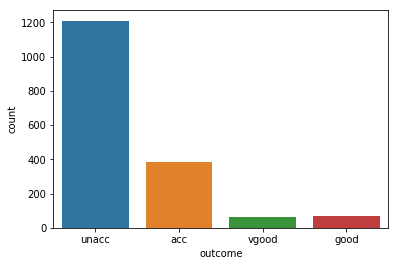

In [10]:
sb.countplot(x = 'outcome', data = dataset)

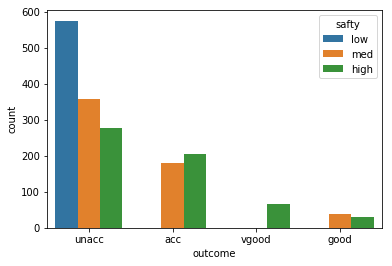

In [11]:
sb.countplot(x = 'outcome', hue = 'safty', data = dataset)

# Data Cleaning and Preprocessing

In [12]:
# Most of the data we have is in categorical format, so we need to encode the data usiing data preprocessing technique, Lable-Encoding

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [13]:
# Lable Encoding all the required columns

dataset.buying = enc.fit_transform(dataset.buying)
dataset.maint = enc.fit_transform(dataset.maint)
dataset.doors = enc.fit_transform(dataset.doors)
dataset.persons = enc.fit_transform(dataset.persons)
dataset.leg_boot = enc.fit_transform(dataset.leg_boot)
dataset.safty = enc.fit_transform(dataset.safty)

In [14]:
#Data after lable Encoding
dataset.head()

,buying,maint,doors,persons,leg_boot,safty,outcome
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc


# Feature Extraction

In [15]:
# feature selection of X and y values

X = dataset.iloc[:, :6]

y = dataset.outcome

In [17]:
#Splitting the data  for  training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Machine Learning Model

In [18]:
# Importing the Support Vector Classifier

from sklearn.svm import SVC

# we can take different parameters for this SVC classifier for better accuracy score

model_svm = SVC(kernel='rbf', C=100, gamma=0.07)
model_svm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.07, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
y_predict_svm = model_svm.predict(X_test)

# Model Evaluation

In [20]:
#Importing the model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
accuracy_score(y_predict_svm, y_test)

0.9930555555555556

In [22]:
confusion_matrix(y_predict_svm, y_test)

array([[ 81,   0,   0,   0],
       [  0,  19,   0,   0],
       [  3,   0, 307,   0],
       [  0,   0,   0,  22]], dtype=int64)

# Grid Search for best parameters

In [23]:
#Finding best Parameters for SVC using Grid Search.

In [24]:
# Grid Search - To find the value for Kernel, C and Gamma to get a good accuray score.
from sklearn.model_selection import train_test_split, GridSearchCV

parameters = [{'kernel':['linear'], 'C':[1, 10, 100, 1000, 10000]}, 
              {'kernel':['rbf'], 'gamma': [.05, 0.1, 0.06, .07, .08], 'C':[1, 10, 100, 1000, 10000]}]

In [25]:
grid_model_svc = GridSearchCV(SVC(), parameters)
grid_model_svc.fit(X_train, y_train)

C:\Users\rocky\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000, 10000]}, {'kernel': ['rbf'], 'gamma': [0.05, 0.1, 0.06, 0.07, 0.08], 'C': [1, 10, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
print(grid_model_svc.best_score_)
print(grid_model_svc.best_params_)

0.9814814814814815
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [27]:
#Use the above parameters in the SVC for better accuracy